In [1]:
run_number          = 4730
LTpitch             = 6.7
XYpitch             = 5.0
input_dst_filename  = f"$IC_DATA/Kr/dst_{run_number}_filtered.root.h5"
correction_filename = f"$IC_DATA/XYmaps/corrections_run{run_number}_LT{LTpitch}mm.h5"

In [2]:
import os

import numpy             as np
import matplotlib.pyplot as plt

import invisible_cities.reco.dst_functions as dstf

%matplotlib inline

In [3]:
input_dst_filename  = os.path.expandvars( input_dst_filename)
correction_filename = os.path.expandvars(correction_filename)

In [14]:
dst          = dstf.load_dst(input_dst_filename, "DST", "Events")

LTcorrection = dstf.load_lifetime_xy_corrections(correction_filename,
                                                 group = "XYcorrections",
                                                 node  =  "Lifetime")

XYcorrection = dstf.load_xy_corrections         (correction_filename,
                                                 group = "XYcorrections",
                                                 node = f"Geometry_{XYpitch:.1f}mm",
                                                 norm_strategy = "const",
                                                 norm_opts = {"value": 41.5}) # automatic conversion to keV assuming Kr energy scale

In [15]:
X  = dst.X  .values
Y  = dst.Y  .values
Z  = dst.Z  .values
E0 = dst.S2e.values
E  = E0 * LTcorrection(Z, X, Y).value * XYcorrection(X, Y).value

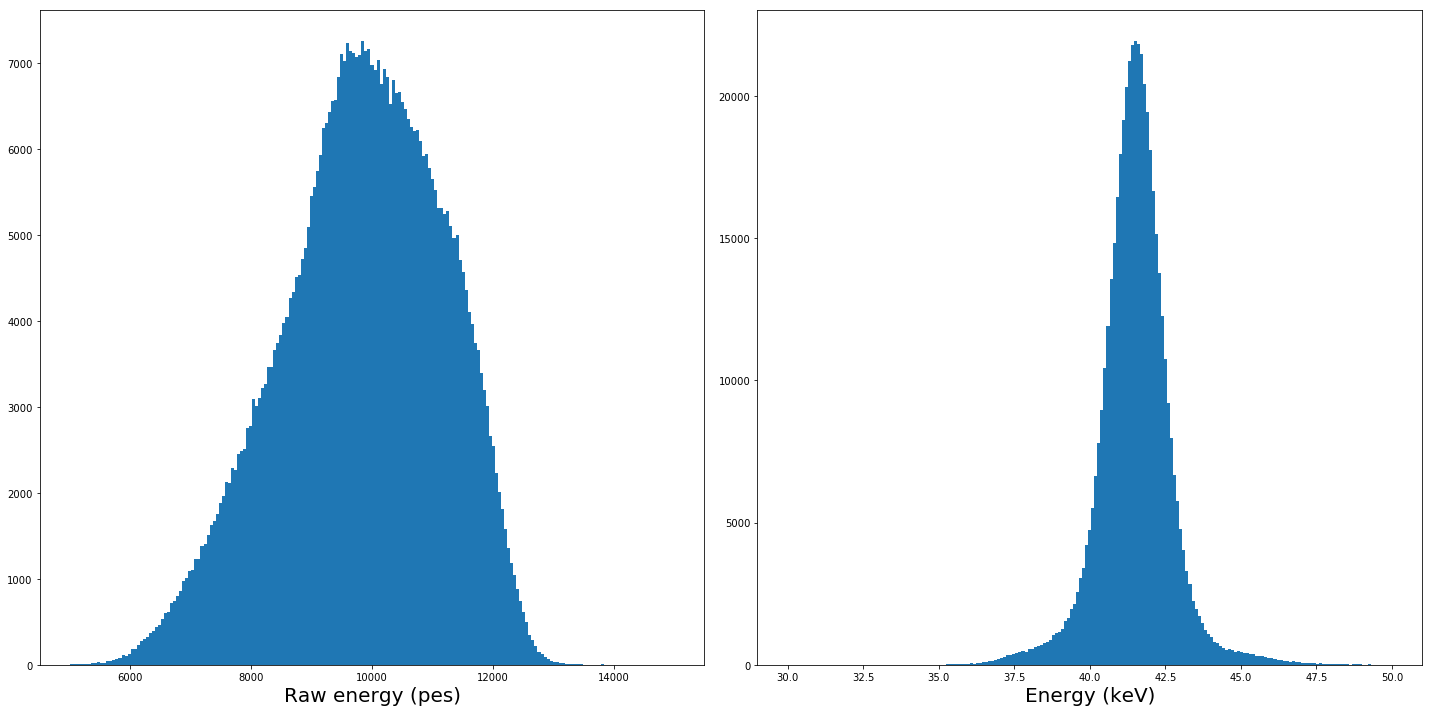

In [31]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.hist(E0, np.linspace(5e3, 15e3, 200))
plt.xlabel("Raw energy (pes)", size=20)

plt.subplot(1, 2, 2)
plt.hist(E, np.linspace(30, 50, 200))
plt.xlabel("Energy (keV)", size=20)

plt.tight_layout()